<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Analysis_of_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [190]:
from google.colab import drive

In [191]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [193]:
dataset = pd.read_csv("winequality-red.csv")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# KNN 

In [194]:
type(dataset)
dataset=pd.DataFrame(dataset)
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [195]:
# taking quality name in y and all other in x variable
x = dataset.drop(['quality'], axis=1)
x = dataset.drop(['chlorides'], axis=1)
x = dataset.drop(['citric acid'], axis=1)
y = dataset['quality']

In [196]:
# spliting data in train and test dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=110) # here 33% dataset will be of testing and 67% will be for training

In [197]:
'''as we know that KNN use distance (usually Euclidean) in its mathematical steps so inorder to give equal important to each and every feature we have
to normalize/ standerdize our data set which uses euqation z=(feature-mean average)/standard deviation
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [198]:
#For choosing the best k value for our KNearestNeighbor Classifier, Let us run the model for different k values (i.e Between 1 and 30) and plot the scores
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
kvals=range(1,25)
scores={}
scores_list=[]
for k in kvals:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

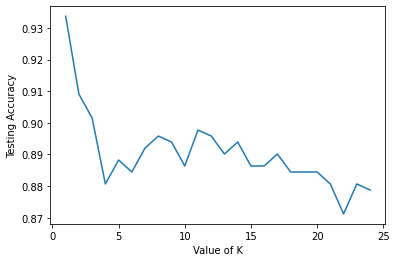

In [199]:
plt.plot(kvals,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

 Above graph shows that for value of K >15 and k<20 we are getting good accuracy, so we can value of k=19 to get good results   (after droping some columns it is different as shown in above graph)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(19, p=19)

In [201]:
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=19,
                     weights='uniform')

In [202]:
# printing of classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, knc.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.07      0.12        15
           5       0.84      0.89      0.86       222
           6       0.82      0.88      0.85       224
           7       0.80      0.66      0.72        59
           8       0.00      0.00      0.00         7

    accuracy                           0.83       528
   macro avg       0.49      0.42      0.43       528
weighted avg       0.80      0.83      0.81       528



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
# confusion matrix for duffrent K 
print(confusion_matrix(y_test, knc.predict(X_test)))

[[  0   1   0   0   0   0]
 [  0   1  14   0   0   0]
 [  0   0 198  24   0   0]
 [  0   0  23 198   3   0]
 [  0   0   1  19  39   0]
 [  0   0   0   0   7   0]]


here we can see that for some parameters if is giving value of precision,recall,f1 as 0 which is reason for getting this much low accuracy if we convert in binary class i.e, for value quality > 5 =good and < 5 = bas then we can achive more accuracy 

## CART (Random forest)

In [204]:
labels=np.array(dataset['quality'])
labels

array([5, 5, 5, ..., 6, 5, 6])

In [205]:
#droping Last column of Quality 
dataset = dataset[dataset.columns[:-1]]
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [206]:
features_list = list(dataset.columns)
dataset=np.array(dataset)
dataset

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [207]:
# spliting data in train and test dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.33, random_state=110) # here 33% dataset will be of testing and 67% will be for training

In [208]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [209]:
predictions = rf.predict(X_test)
predictions

array([5.774, 5.346, 5.724, 6.51 , 6.184, 6.62 , 6.308, 5.42 , 5.626,
       5.206, 5.278, 6.492, 6.014, 5.586, 6.972, 5.238, 6.204, 6.56 ,
       5.892, 5.102, 6.026, 4.84 , 6.512, 5.828, 5.178, 5.068, 5.67 ,
       4.912, 5.132, 5.698, 6.916, 5.284, 5.748, 5.874, 5.878, 6.25 ,
       5.17 , 6.838, 6.444, 5.894, 5.422, 6.278, 5.142, 5.946, 5.932,
       6.138, 5.388, 5.512, 5.284, 5.192, 5.53 , 5.094, 5.942, 6.084,
       5.076, 5.216, 5.392, 6.262, 4.924, 5.104, 6.958, 5.996, 6.726,
       5.864, 5.116, 5.634, 6.558, 4.974, 5.306, 6.708, 5.104, 5.412,
       5.498, 5.352, 5.154, 5.422, 5.658, 5.28 , 6.96 , 5.286, 5.192,
       5.078, 5.382, 4.548, 5.552, 6.022, 5.458, 5.71 , 6.084, 5.376,
       5.09 , 5.572, 5.158, 5.182, 5.796, 5.268, 5.164, 5.894, 6.144,
       6.324, 6.644, 5.252, 6.616, 5.716, 5.674, 5.14 , 5.932, 6.244,
       6.75 , 5.2  , 5.254, 6.098, 5.966, 5.176, 5.416, 5.966, 5.358,
       5.05 , 5.092, 5.36 , 6.28 , 6.   , 6.146, 6.056, 5.832, 5.058,
       6.142, 5.024,

In [210]:
errors= abs(predictions-y_test)
errors

array([2.260e-01, 6.540e-01, 2.760e-01, 4.900e-01, 1.816e+00, 3.800e-01,
       3.080e-01, 5.800e-01, 6.260e-01, 2.060e-01, 2.780e-01, 5.080e-01,
       1.400e-02, 5.860e-01, 2.800e-02, 7.620e-01, 7.960e-01, 5.600e-01,
       1.080e-01, 1.020e-01, 2.600e-02, 1.600e-01, 5.120e-01, 1.720e-01,
       1.780e-01, 9.320e-01, 6.700e-01, 8.800e-02, 1.320e-01, 3.020e-01,
       8.400e-02, 2.840e-01, 2.520e-01, 1.260e-01, 1.122e+00, 2.500e-01,
       1.700e-01, 8.380e-01, 1.556e+00, 1.060e-01, 5.780e-01, 2.780e-01,
       8.580e-01, 5.400e-02, 6.800e-02, 1.380e-01, 6.120e-01, 5.120e-01,
       7.160e-01, 1.920e-01, 5.300e-01, 1.094e+00, 9.420e-01, 8.400e-02,
       9.240e-01, 2.160e-01, 3.920e-01, 2.620e-01, 7.600e-02, 1.040e-01,
       4.200e-02, 4.000e-03, 2.740e-01, 1.360e-01, 1.160e-01, 6.340e-01,
       4.420e-01, 2.600e-02, 3.060e-01, 2.920e-01, 1.040e-01, 4.120e-01,
       4.980e-01, 3.520e-01, 1.540e-01, 4.220e-01, 6.580e-01, 7.200e-01,
       4.000e-02, 2.860e-01, 1.920e-01, 7.800e-02, 

In [246]:
# Mean_absolute percentage error
mape=100*(errors/y_test)
mean_error = np.mean(mape)
accuracy = 100-mean_error
print ("Accuracy is : ",accuracy) 

Accuracy is :  92.64311417748918


In [247]:
from sklearn.tree import export_graphviz
import pydot

In [248]:
tree=rf.estimators_[5]
export_graphviz(tree,out_file='tree.dot',feature_names=features_list,rounded=True,precision=1)

In [249]:
(graph,)=pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png');

##Hierarchical clustering

In [250]:
# Nomalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(x)
x = scaler.transform(x)

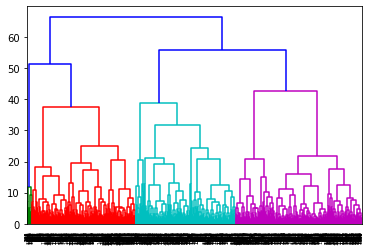

In [216]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))

In [217]:
from sklearn.cluster import AgglomerativeClustering

In [218]:
hc=AgglomerativeClustering(n_clusters=7)

In [219]:
y_hc=hc.fit_predict(x)
y_hc

array([2, 0, 2, ..., 0, 0, 0])

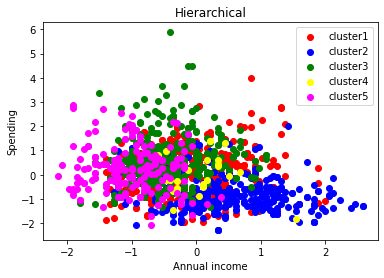

In [220]:
# cluster visulization
x=np.array(x)
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],c='red',label='cluster1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],c='blue',label='cluster2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],c='green',label='cluster3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],c='yellow',label='cluster4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],c='magenta',label='cluster5')
plt.title('Hierarchical')
plt.xlabel('Annual income')
plt.ylabel('Spending')
plt.legend()

##KMeans

In [221]:
type(dataset)
dataset=pd.DataFrame(dataset)
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [222]:
from sklearn.cluster import KMeans

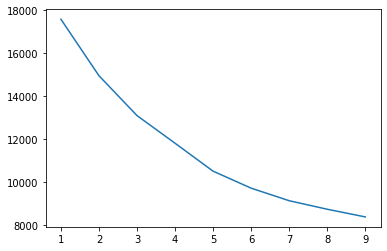

In [223]:
wcss = []
for i in range(1,10):
  kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmean.fit_predict(x)
  wcss.append(kmean.inertia_)
plt.plot(range(1,10),wcss)

In [224]:
kmean=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmean.fit_predict(x)
print(y_kmeans)

[0 0 0 ... 2 0 2]


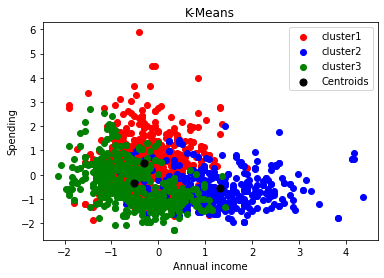

In [225]:
x=np.array(x)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],c='green',label='cluster3')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('K-Means')
plt.legend()

##DBSCAN

In [226]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [227]:
X=StandardScaler().fit_transform(x) # here we can see data is in large range so to make values smaller so that we can take small value of Radius r and form cluster
X 

array([[-0.52835961,  0.96187667, -0.45321841, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245,  0.04341614, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -0.16942723, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.16942723, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.38227061, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  0.75289408, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [228]:
ns=3
nearestneighbours=NearestNeighbors(3).fit(X)
nearestneighbours

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [229]:
distances, indices = nearestneighbours.kneighbors(X)
indices

array([[   4,    0,    5],
       [   1,    2,  629],
       [   2,  273,  412],
       ...,
       [1592, 1596, 1171],
       [1597, 1594,  871],
       [1598,  315, 1571]])

In [230]:
distanceDec = sorted(distances[:,ns-1], reverse=True)

In [231]:
distances

array([[0.        , 0.        , 0.35396275],
       [0.        , 1.33247162, 1.50249612],
       [0.        , 1.0256131 , 1.02604451],
       ...,
       [0.        , 0.        , 0.89262616],
       [0.        , 1.24827401, 1.3395414 ],
       [0.        , 1.33027941, 1.43993828]])

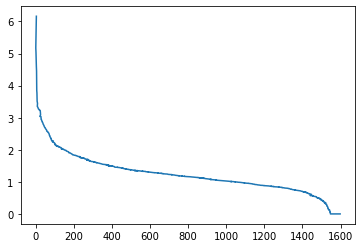

In [232]:
plt.plot(indices[:,0], distanceDec) # it is basically Elbow method to indentifie most appropriate number of cluster

In above graph it is easily visible that value of EPS = 2 

In [233]:
db=DBSCAN(eps=2,min_samples=5).fit(X)

In [234]:
labels = db.labels_
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [235]:
db.core_sample_indices_   #Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

array([   0,    1,    2, ..., 1596, 1597, 1598])

In [236]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [237]:
core_samples_mask

array([False, False, False, ..., False, False, False])

In [238]:
core_samples_mask[db.core_sample_indices_] = True

In [239]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [240]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 151


In [241]:
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

In [242]:
np.linspace(0, 1, len(unique_labels))

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

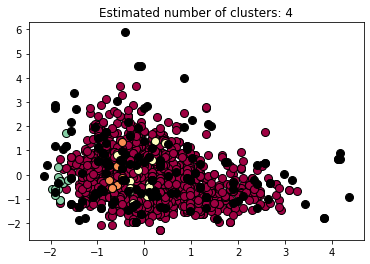

In [251]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)          #noise point will be true else it will be false

    xy = X[class_member_mask & core_samples_mask]                             #core sample and not noise sample
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]                            #not core sample i.e boundary samples and not noise sample
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Here we can see that for classification, in KNN  it gives 60% accuracy if I consider all the 11 features but after removing 2 features(chlorides and citric acid because values are very close to zero) I'm getting 83% accuracy while for the same dataset in CART method it is 92%.
If we compare the result of all clustering. For all clustering it is giving a different number of clusters. And it is also difficult to visualize all clustering algorithms because of the high-dimensions(9).But DBSCAN has a benefit that by using it we can findout separate outliers. Also for classification if we convert our target variable in binary class then we will get around 95% accuracy